In [151]:
%run helpers/autoct_plotting.py

import autoct
from os.path import join

autoct.setup_logging('INFO')

def p_plot_image(img, n_cuts=7):
    from nilearn.plotting.find_cuts import find_cut_slices
    import nilearn.plotting as plotting
    
    axes = ('x', 'y', 'z')
    all_cuts = [find_cut_slices(img, n_cuts=n_cuts, direction=axis) for axis in axes]
    cut_coords = [cuts[int(n_cuts/2) + 1] for cuts in all_cuts]
    
    cut_coords = [5, -161, -108]
    cut_coords = [9, 5, 11]
    print(cut_coords)
    plotting.plot_img(img, display_mode='ortho', cut_coords=tuple(cut_coords))
    plotting.show()
        

def p_plot_images(pattern):
    from glob import glob
    import nibabel as nib
    
    for nii_file in glob(pattern):
        img = nib.load(nii_file)
        shape = img.shape
        
        if len(shape) == 3:
            print('Plotting {}:shape={}'.format(nii_file, shape))
            p_plot_image(img)
            
        if len(shape) == 5 and shape[3] == 1 and shape[4] == 3:
            data = img.get_fdata()
            
            for v in range(3):
                print('Plotting {}:volume={}:shape={}'.format(nii_file, v+1, shape))
                img = img.__class__(data[:, :, :, :, v:v+1].squeeze(), affine=img.affine)
                p_plot_image(img)

In [17]:
output = 'data/illustration_workflow_output'
mni_file = 'illustration_data/MNI152_T1_1mm_brain.nii.gz'
atlas_file = 'illustration_data/New_atlas_cort_asym_sub.nii.gz'
template_file = 'illustration_data/T_template0.nii.gz'

In [49]:
autoct.convert(pattern='illustration_data/dcmfiles/*',
            out_dir=output,
            use_dcm2niix=True)

2021-09-29 15:19:54,510 :: autoct.convert :: INFO :: Arguments: illustration_data/dcmfiles/*:data/illustration_workflow_output
2021-09-29 15:19:54,512 :: autoct.convert :: INFO :: Processing folder illustration_data/dcmfiles/ID_0eba6ca7-7473dee7c1
2021-09-29 15:19:54,826 :: autoct.convert :: INFO :: Saved data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/convert/ID_0eba6ca7-7473dee7c1.nii.gz
2021-09-29 15:19:54,827 :: autoct.utils :: INFO :: Done: processed=1


(0, None)

Plotting data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/convert/ID_0eba6ca7-7473dee7c1.nii.gz:shape=(512, 512, 35)
[5, -161, -108]


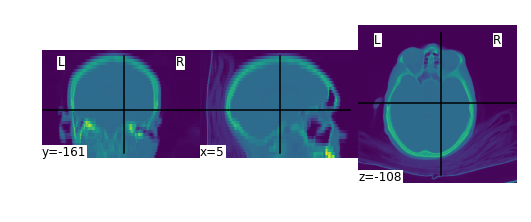

In [120]:
p_plot_images(join(output, '*', 'convert', '*.nii.gz'))

In [121]:
autoct.preprocessing(pattern=join(output, '*', 'convert', '*.nii.gz'),
                  out_dir=output,
                  mni_file=mni_file)

2021-09-29 15:34:21,290 :: autoct.preprocessing :: INFO :: Arguments: data/illustration_workflow_output/*/convert/*.nii.gz:data/illustration_workflow_output:illustration_data/MNI152_T1_1mm_brain.nii.gz
2021-09-29 15:34:21,292 :: autoct.preprocessing :: INFO :: Found 1 files
2021-09-29 15:34:21,293 :: autoct.preprocessing :: INFO :: Processing data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/convert/ID_0eba6ca7-7473dee7c1.nii.gz
2021-09-29 15:36:01,599 :: autoct.preprocessing :: INFO :: Saved to data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/preprocessing/ID_0eba6ca7-7473dee7c1
2021-09-29 15:36:01,601 :: autoct.utils :: INFO :: Done: processed=1


(0, None)

Plotting data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/preprocessing/ID_0eba6ca7-7473dee7c1_normalizedInverseWarped.nii.gz:shape=(250, 250, 170)
[5, -3, 6]


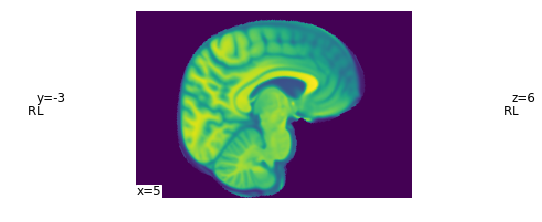

Plotting data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/preprocessing/ID_0eba6ca7-7473dee7c1_normalizedWarped.nii.gz:shape=(182, 218, 182)
[5, -3, 6]


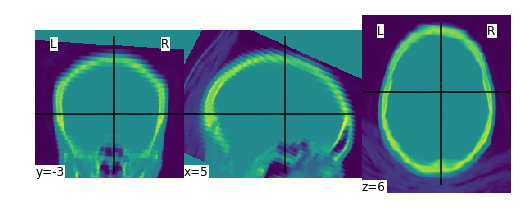

In [139]:
p_plot_images(join(output, '*', 'preprocessing', '*.nii.gz'))

In [123]:
autoct.bone_strip(pattern=join(output, '*', 'preprocessing', '*.nii.gz'),
                out_dir=output)

2021-09-29 15:36:05,777 :: autoct.bone_strip :: INFO :: Arguments: data/illustration_workflow_output/*/preprocessing/*.nii.gz:data/illustration_workflow_output
2021-09-29 15:36:05,780 :: autoct.bone_strip :: INFO :: Found 1 files
2021-09-29 15:36:05,780 :: autoct.bone_strip :: INFO :: Processing file data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/preprocessing/ID_0eba6ca7-7473dee7c1_normalizedWarped.nii.gz
2021-09-29 15:36:13,745 :: autoct.bone_strip :: INFO :: Saved to data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/bone_strip/ID_0eba6ca7-7473dee7c1_brain.nii.gz
2021-09-29 15:36:13,746 :: autoct.utils :: INFO :: Done: processed=1


(0, None)

Plotting data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/bone_strip/ID_0eba6ca7-7473dee7c1_brain.nii.gz:shape=(182, 218, 182)
[9, 5, 11]


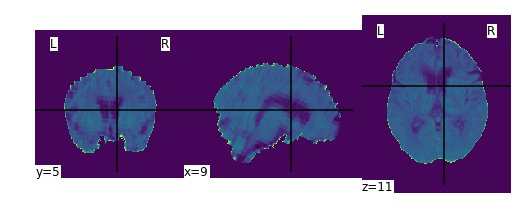

In [152]:
p_plot_images(join(output, '*', 'bone_strip', '*.nii.gz'))

In [125]:
autoct.registration(pattern=join(output, '*', 'bone_strip', '*.nii.gz'),
                 out_dir=output,
                 template=template_file,
                 transforms=autoct.supported_registration_transforms())

2021-09-29 15:36:14,781 :: autoct.registration :: INFO :: Arguments: data/illustration_workflow_output/*/bone_strip/*.nii.gz:data/illustration_workflow_output:illustration_data/T_template0.nii.gz:('s', 'a', 'so')
2021-09-29 15:36:14,782 :: autoct.registration :: INFO :: Found 1 files
2021-09-29 15:36:14,783 :: autoct.registration :: INFO :: Processing a:data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/bone_strip/ID_0eba6ca7-7473dee7c1_brain.nii.gz
2021-09-29 15:36:28,478 :: autoct.registration :: INFO :: Saved to data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine/ID_0eba6ca7-7473dee7c1_preprocessed_affine
2021-09-29 15:36:28,478 :: autoct.registration :: INFO :: Processing s:data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/bone_strip/ID_0eba6ca7-7473dee7c1_brain.nii.gz
2021-09-29 15:37:33,504 :: autoct.registration :: INFO :: Saved to data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_S

(0, None)

Plotting data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine/ID_0eba6ca7-7473dee7c1_preprocessed_affineWarped.nii.gz:shape=(182, 218, 182)
[9, 5, 11]


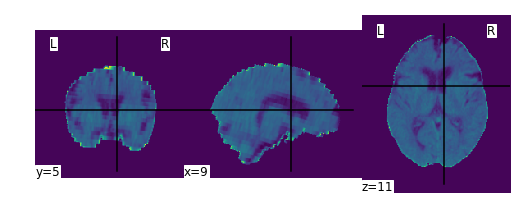

Plotting data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine/ID_0eba6ca7-7473dee7c1_preprocessed_affineInverseWarped.nii.gz:shape=(182, 218, 182)
[9, 5, 11]


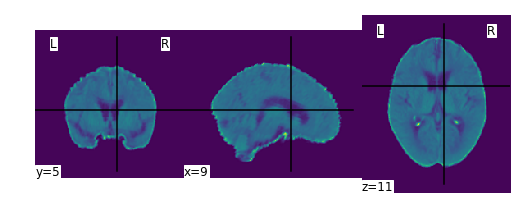

Plotting data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyN1Warp.nii.gz:volume=1:shape=(182, 218, 182, 1, 3)
[9, 5, 11]


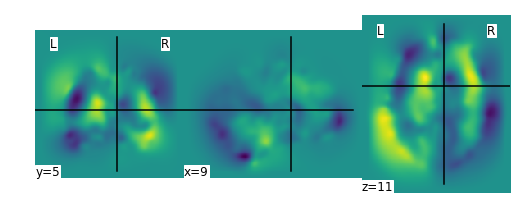

Plotting data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyN1Warp.nii.gz:volume=2:shape=(182, 218, 182, 1, 3)
[9, 5, 11]


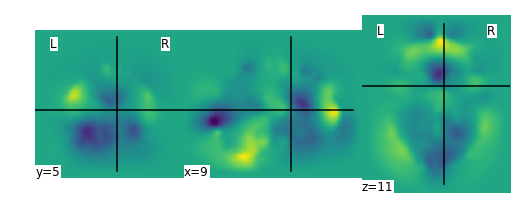

Plotting data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyN1Warp.nii.gz:volume=3:shape=(182, 218, 182, 1, 3)
[9, 5, 11]


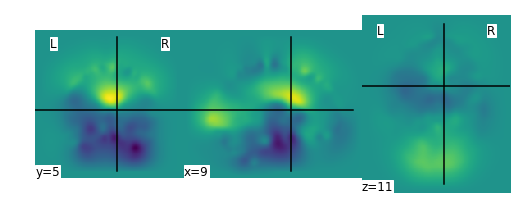

Plotting data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyN1InverseWarp.nii.gz:volume=1:shape=(182, 218, 182, 1, 3)
[9, 5, 11]


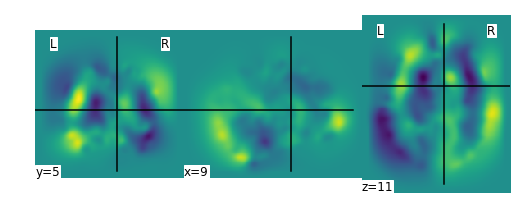

Plotting data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyN1InverseWarp.nii.gz:volume=2:shape=(182, 218, 182, 1, 3)
[9, 5, 11]


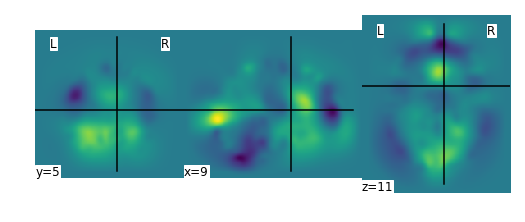

Plotting data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyN1InverseWarp.nii.gz:volume=3:shape=(182, 218, 182, 1, 3)
[9, 5, 11]


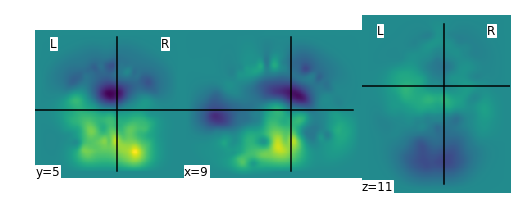

Plotting data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyNInverseWarped.nii.gz:shape=(182, 218, 182)
[9, 5, 11]


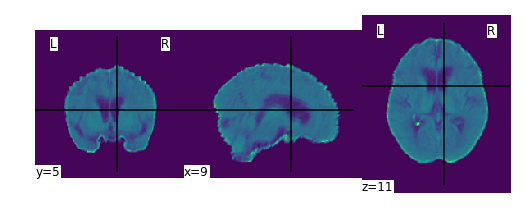

Plotting data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyNWarped.nii.gz:shape=(182, 218, 182)
[9, 5, 11]


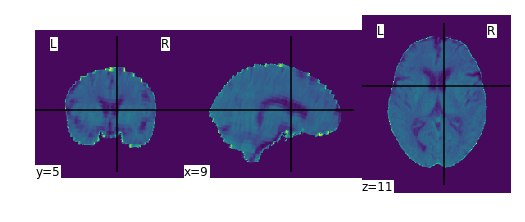

Plotting data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2SynWarped.nii.gz:shape=(182, 218, 182)
[9, 5, 11]


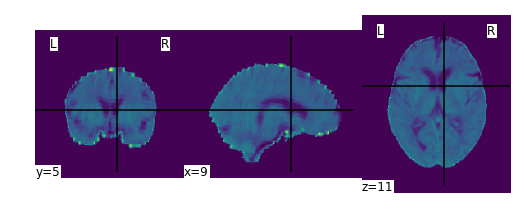

Plotting data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1Warp.nii.gz:volume=1:shape=(182, 218, 182, 1, 3)
[9, 5, 11]


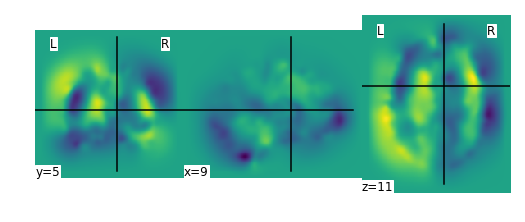

Plotting data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1Warp.nii.gz:volume=2:shape=(182, 218, 182, 1, 3)
[9, 5, 11]


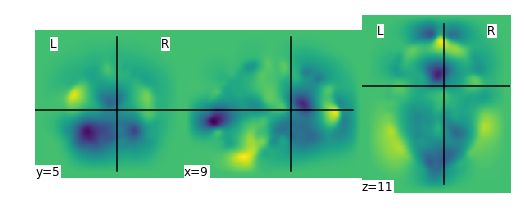

Plotting data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1Warp.nii.gz:volume=3:shape=(182, 218, 182, 1, 3)
[9, 5, 11]


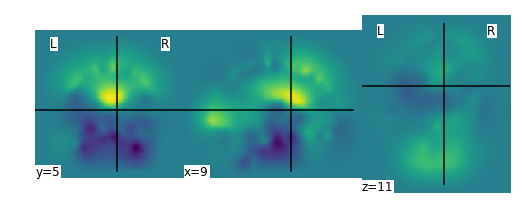

Plotting data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2SynInverseWarped.nii.gz:shape=(182, 218, 182)
[9, 5, 11]


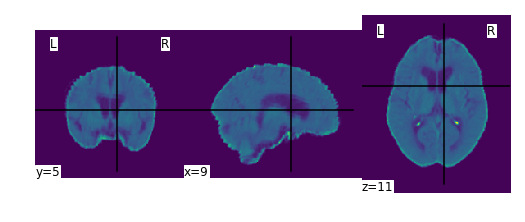

Plotting data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1InverseWarp.nii.gz:volume=1:shape=(182, 218, 182, 1, 3)
[9, 5, 11]


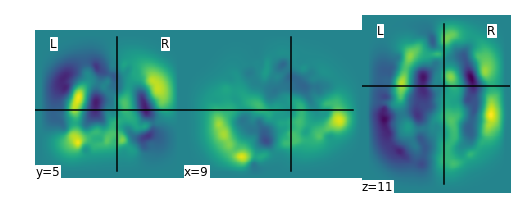

Plotting data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1InverseWarp.nii.gz:volume=2:shape=(182, 218, 182, 1, 3)
[9, 5, 11]


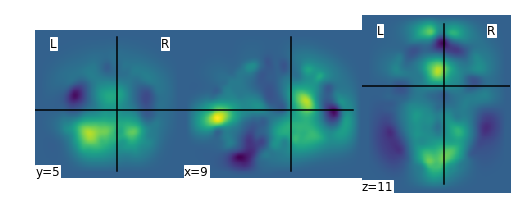

Plotting data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1InverseWarp.nii.gz:volume=3:shape=(182, 218, 182, 1, 3)
[9, 5, 11]


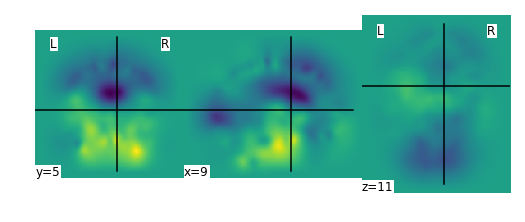

In [153]:
p_plot_images(join(output, '*', 'registration', '*/*.nii.gz'))

In [127]:
autoct.segmentation(pattern=join(output, '*', 'registration', '*/*.nii.gz'),
                 out_dir=output,
                 atlas=atlas_file,
                 types=autoct.supported_segmentation_types())

2021-09-29 15:38:58,858 :: autoct.segmentation :: INFO :: Arguments: data/illustration_workflow_output/*/registration/*/*.nii.gz:data/illustration_workflow_output:illustration_data/New_atlas_cort_asym_sub.nii.gz:('Affine', 'Physical')
2021-09-29 15:38:58,861 :: autoct.segmentation :: INFO :: Found 2 files
2021-09-29 15:38:58,861 :: autoct.segmentation :: INFO :: Processing Affine:data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1InverseWarp.nii.gz
2021-09-29 15:39:04,064 :: autoct.segmentation :: INFO :: Saved to data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/segmentation/AFFINE/ID_0eba6ca7-7473dee7c1_segmentation_cortical_affine.nii.gz
2021-09-29 15:39:04,065 :: autoct.segmentation :: INFO :: Processing Physical:data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyN1InverseWarp.nii.gz
2021-09-29 15:39:09,819 :: autoct.segmentation :: INFO :

(0, None)

Plotting data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/segmentation/PHYSCi/ID_0eba6ca7-7473dee7c1_segmentation_cortical_phy.nii.gz:shape=(182, 218, 182)
[9, 5, 11]


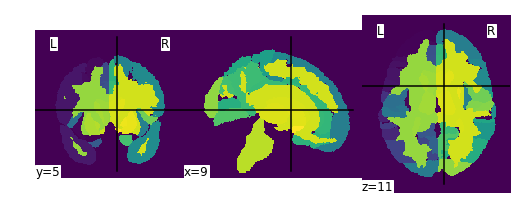

Plotting data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/segmentation/AFFINE/ID_0eba6ca7-7473dee7c1_segmentation_cortical_affine.nii.gz:shape=(182, 218, 182)
[9, 5, 11]


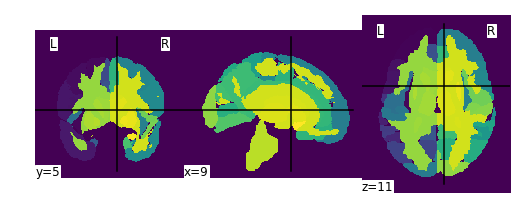

In [154]:
p_plot_images(join(output, '*', 'segmentation', '*/*.nii.gz'))

In [129]:
autoct.label_geometry_measures(pattern=join(output, '*', 'segmentation', '*/*.nii.gz'),
                            out_dir=output)

2021-09-29 15:39:12,879 :: autoct.label_geometry_measures :: INFO :: Arguments data/illustration_workflow_output/*/segmentation/*/*.nii.gz:data/illustration_workflow_output
2021-09-29 15:39:12,881 :: autoct.label_geometry_measures :: INFO :: Found 2 files
2021-09-29 15:39:12,882 :: autoct.label_geometry_measures :: INFO :: Processing file name:  data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/segmentation/AFFINE/ID_0eba6ca7-7473dee7c1_segmentation_cortical_affine.nii.gz
2021-09-29 15:39:12,883 :: autoct.label_geometry_measures :: INFO :: Saving to file name: data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/label_geometry_measures/ID_0eba6ca7-7473dee7c1_segmentation_cortical_affine.txt
2021-09-29 15:39:13,771 :: autoct.label_geometry_measures :: INFO :: Saving to csv file name: data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/label_geometry_measures/ID_0eba6ca7-7473dee7c1_segmentation_cortical_affine.csv
2021-09-29 15:39:13,779 :: autoct.label_geometry_measures 

(0, None)

In [130]:
plot_csv_files(pattern=join(output, '*', 'label_geometry_measures', '*.csv'))

Plotting csv file data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/label_geometry_measures/ID_0eba6ca7-7473dee7c1_segmentation_cortical_phy.csv


,Label,Volume(voxels),SurfArea(mm^2),Eccentricity,Elongation
0,1,54710,13449.000,0.930690,2.73368
1,2,9605,4065.430,0.974229,4.43336
2,3,21944,7673.030,0.955051,3.37333
3,4,23478,6722.680,0.917351,2.51206
4,5,5385,2243.950,0.884498,2.14342
...,...,...,...,...,...
110,111,6808,2497.240,0.953256,3.30946
111,112,2460,1081.860,0.923031,2.59925
112,113,6537,2653.410,0.977777,4.76988
113,114,3196,1271.280,0.813725,1.72043


Plotting csv file data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/label_geometry_measures/ID_0eba6ca7-7473dee7c1_segmentation_cortical_affine.csv


,Label,Volume(voxels),SurfArea(mm^2),Eccentricity,Elongation
0,1,53268,13264.500,0.931724,2.75355
1,2,9426,4002.370,0.975470,4.54268
2,3,21585,7612.840,0.960196,3.58004
3,4,23194,6691.660,0.921834,2.58009
4,5,5304,2191.180,0.887219,2.16756
...,...,...,...,...,...
110,111,6612,2412.230,0.954775,3.36328
111,112,2366,1063.030,0.930227,2.72491
112,113,6570,2631.260,0.978918,4.89586
113,114,3088,1251.460,0.830287,1.79425


In [131]:
autoct.warp_intensity_stats(pattern=join(output, '*', 'registration', '*/*.nii.gz'),
                         out_dir=output,
                         atlas=atlas_file)

2021-09-29 15:39:14,443 :: autoct.warp_intensity_stats :: INFO :: Arguments data/illustration_workflow_output/*/registration/*/*.nii.gz:data/illustration_workflow_output:illustration_data/New_atlas_cort_asym_sub.nii.gz
2021-09-29 15:39:14,445 :: autoct.warp_intensity_stats :: INFO :: Found 1 files
2021-09-29 15:39:14,446 :: autoct.warp_intensity_stats :: INFO :: Processing data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1Warp.nii.gz
2021-09-29 15:39:15,863 :: autoct.warp_intensity_stats :: INFO :: Saved to csv file name: data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/warp_intensity_stats/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1Warp.csv
2021-09-29 15:39:15,864 :: autoct.utils :: INFO :: Done: processed=1


(0, None)

In [132]:
plot_csv_files(pattern=join(output, '*', 'warp_intensity_stats', '*.csv'))

Plotting csv file data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/warp_intensity_stats/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1Warp.csv


,Label,Mean,Sigma,Skewness,Kurtosis
0,1,-0.884515,0.684506,-1.109390,-9819.53000
1,2,-1.353240,0.898480,-1.124440,-1588.82000
2,3,-0.260970,0.416690,-0.333888,-634.76800
3,4,-0.375952,0.327257,0.234510,1011.58000
4,5,-0.634019,0.242167,-0.862700,-585.42900
...,...,...,...,...,...
110,111,-1.261490,0.432541,-0.002138,39.82310
111,112,-1.293230,0.282465,0.040089,2.91691
112,113,-0.960262,0.406950,0.028298,9.01636
113,114,-1.802590,0.261019,-0.117452,-42.23430
